 Eksploracja danych i budowa modelu klasyfikacyjnego (zdatność wody do picia)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [5]:
data = pd.read_csv("water_potability.csv")

In [6]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.213302,189.681916,21057.662214,8.114224,230.507961,426.226462,9.954290,57.316487,3.100232,1
1,6.272011,188.020564,25394.740904,8.153630,383.472420,358.882079,13.810410,72.154087,2.741828,0
2,7.525316,172.133603,11166.376305,7.899896,326.518080,420.570021,8.614537,72.367363,4.332616,0
3,7.658395,217.139317,18288.211026,7.528133,294.005453,400.717449,11.138576,72.966391,4.153343,0
4,5.634275,209.385848,24974.919772,7.495392,314.950949,531.406569,13.023235,76.684441,1.775441,0
...,...,...,...,...,...,...,...,...,...,...
4995,7.754235,264.804246,22515.647980,9.117795,400.864300,437.755539,20.840957,49.649845,5.039723,0
4996,6.759721,197.472807,19962.843833,6.025457,304.523496,435.219703,17.538170,48.078922,3.236085,1
4997,7.546477,203.409951,12698.788440,7.769574,331.285806,569.447080,11.754191,100.532347,3.173381,0
4998,7.034818,244.989768,14062.084121,7.637251,296.592672,450.503656,8.015346,51.791159,4.062713,1


# Water potability
Zbiór water potability.csv dotyczy jakości wody pitnej. Każdy wiersz reprezentuje próbkę wody, a celem jest określenie, czy woda nadaje się do picia (potable) czy nie.

Kolumna Potability jest zmienną docelową (target), czyli wskazuje, czy dana próbka wody jest bezpieczna do spożycia:

- 1 - woda nadaje się do picia
- 0 - woda nie nadaje się do picia

Opis kolumn

1. ph - kwasowość wody, określa, jak kwaśna lub zasadowa jest woda. Wartości typowo od 0 do 14, gdzie 7 to neutralne pH.
2. Hardness - twardość wody, wyższe wartości oznaczają wodę "twardszą", bogatą w minerały, głównie wapń i magnez.
3. Solids - całkowite rozpuszczone substancje stałe, ilość wszystkich rozpuszczonych ciał stałych w wodzie np. minerały, sole.
4. Chloramines - zawartość chloramin, chloraminy to związki stosowane do dezynfekcji wody. Zbyt wysoki poziom może wpływać na smak lub bezpieczeństwo wody.
5. Sulfate - zawartość siarczanów, wyższe stężenia mogą wpływać na smak wody lub mieć skutki zdrowotne.
6. Conductivity - przewodność wody, mierzy zdolność wody do przewodzenia prądu elektrycznego, co zależy od ilości rozpuszczonych soli.
7. Organic_carbon - zawartość węgla organicznego, wskazuje ilość substancji organicznych w wodzie, które mogą pochodzić np. z roślin, ścieków lub gleby.
8. Trihalomethanes - zawartość trihalometanów, produkty uboczne dezynfekcji wody, które w wysokich stężeniach mogą być szkodliwe.
9. Turbidity - mętność wody, określa, jak klarowna jest woda. Wyższe wartości oznaczają wodę bardziej mętną, co może sugerować zanieczyszczenie.
10. Potability - zdatność wody do picia, Zmienna docelowa (0 lub 1).

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               4726 non-null   float64
 1   Hardness         5000 non-null   float64
 2   Solids           5000 non-null   float64
 3   Chloramines      5000 non-null   float64
 4   Sulfate          4747 non-null   float64
 5   Conductivity     5000 non-null   float64
 6   Organic_carbon   5000 non-null   float64
 7   Trihalomethanes  4780 non-null   float64
 8   Turbidity        5000 non-null   float64
 9   Potability       5000 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 390.8 KB


In [8]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,4726.000000,5000.000000,5000.000000,5000.000000,4747.000000,5000.000000,5000.000000,4780.000000,5000.000000,5000.000000
mean,6.984380,199.980204,19948.861381,7.059326,331.188155,420.594678,14.018669,69.488975,3.992224,0.147800
std,0.697679,40.506634,5992.878200,1.206700,59.252676,81.193878,3.996055,20.126654,0.995626,0.354937
min,4.446111,50.000000,1000.000000,2.559890,118.175454,142.850929,0.500000,5.000000,0.500000,0.000000
25%,6.516807,173.534032,15916.063970,6.231954,291.853816,365.527477,11.313651,56.204461,3.329062,0.000000
50%,6.997921,199.197768,19807.366440,7.056188,331.276282,420.970200,13.992790,69.337944,3.994686,0.000000
75%,7.433408,226.891943,23974.756711,7.876622,370.094904,475.741736,16.701769,82.958951,4.664020,0.000000
max,9.417832,361.032962,44907.448382,10.840292,543.381767,714.600760,30.000000,156.538415,9.007235,1.000000


In [9]:
# Sprawdzenie braków danych
missing_counts = data.isnull().sum()
missing_counts

,0
ph,274
Hardness,0
Solids,0
Chloramines,0
Sulfate,253
Conductivity,0
Organic_carbon,0
Trihalomethanes,220
Turbidity,0
Potability,0


In [10]:
 # procent braków
 missing_percent = (missing_counts / len(data)) * 100
 missing_percent

,0
ph,5.48
Hardness,0.00
Solids,0.00
Chloramines,0.00
Sulfate,5.06
Conductivity,0.00
Organic_carbon,0.00
Trihalomethanes,4.40
Turbidity,0.00
Potability,0.00


In [11]:
missing_df = pd.DataFrame({'Braki liczba': missing_counts, 'Braki procent': missing_percent})
missing_df

,Braki liczba,Braki procent
ph,274,5.48
Hardness,0,0.00
Solids,0,0.00
Chloramines,0,0.00
Sulfate,253,5.06
Conductivity,0,0.00
Organic_carbon,0,0.00
Trihalomethanes,220,4.40
Turbidity,0,0.00
Potability,0,0.00


In [12]:
# tylko kolumny z brakami
missing_df = missing_df[missing_df['Braki liczba'] > 0]

print("Kolumny z brakami danych:\n")
print(missing_df)

Kolumny z brakami danych:

                 Braki liczba  Braki procent
ph                        274           5.48
Sulfate                   253           5.06
Trihalomethanes           220           4.40


/tmp/ipython-input-149/3840780311.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_df.index, y=missing_df['Braki liczba'],palette='viridis')


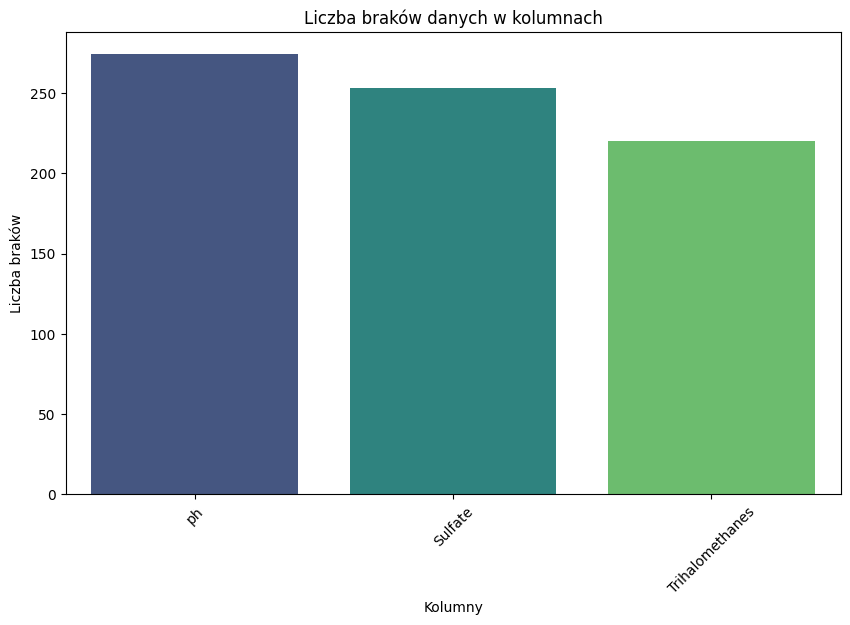

In [13]:
# Wykres słupkowy braków
plt.figure(figsize=(10,6))
sns.barplot(x=missing_df.index, y=missing_df['Braki liczba'],palette='viridis')
plt.title("Liczba braków danych w kolumnach")
plt.ylabel("Liczba braków")
plt.xlabel("Kolumny")
plt.xticks(rotation=45)
plt.show()

Podstawowe wykresy

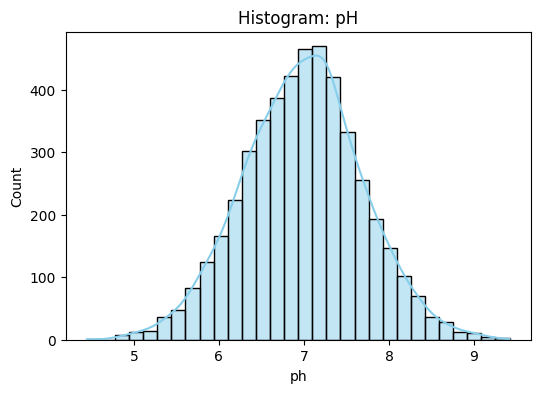

In [14]:
plt.figure(figsize=(6,4))
sns.histplot(data['ph'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Histogram: pH')
plt.show()

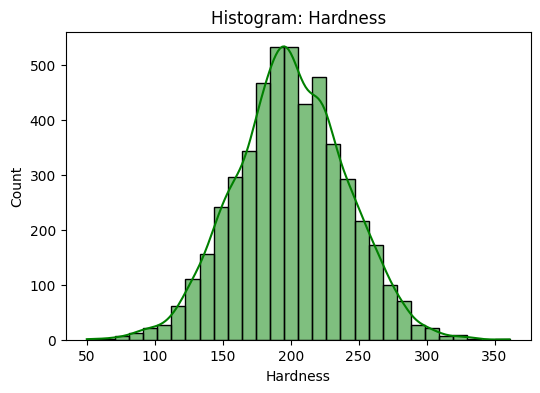

In [15]:
plt.figure(figsize=(6,4))
sns.histplot(data['Hardness'].dropna(), bins=30,kde=True,color='green')
plt.title('Histogram: Hardness')
plt.show()

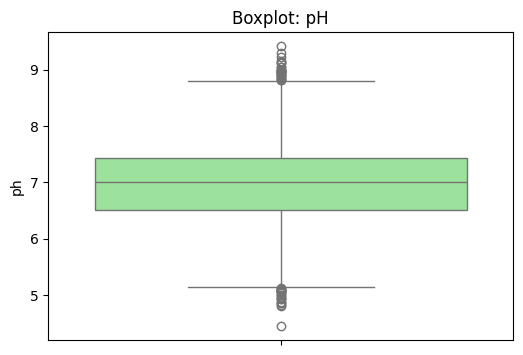

In [16]:
plt.figure(figsize=(6,4))
sns.boxplot(y=data['ph'], color='lightgreen')
plt.title('Boxplot: pH')
plt.show()

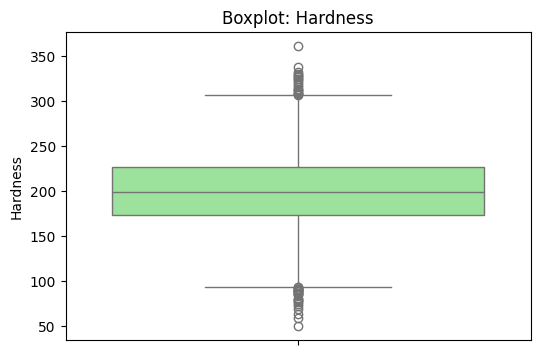

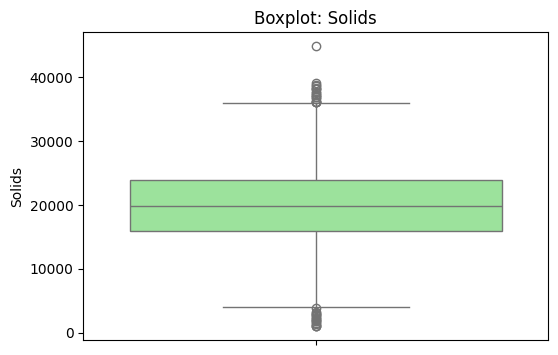

In [17]:
plt.figure(figsize=(6,4))
sns.boxplot(y=data['Hardness'], color='lightgreen')
plt.title('Boxplot: Hardness')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(y=data['Solids'], color='lightgreen')
plt.title('Boxplot: Solids')
plt.show()

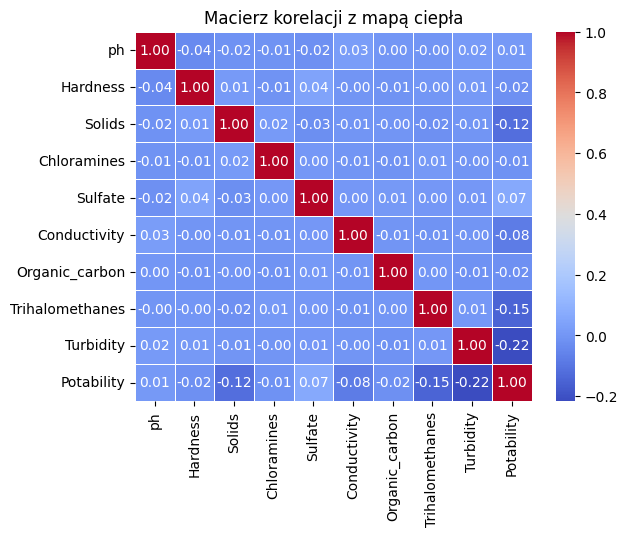

In [18]:
# macierz korelacji
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Macierz korelacji z mapą ciepła')
plt.show()

In [19]:
# Uzupełnienie braków danych
# Wybieramy medianę, ponieważ woda może mieć skrajne wartości w różnych próbkach

data_prepared = data.copy()

data_prepared.fillna(data_prepared.median(), inplace=True)

# sprawdzenie
print("Braki danych po uzupełnieniu")
print(data_prepared.isnull().sum())

Braki danych po uzupełnieniu
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [20]:
data_prepared

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.213302,189.681916,21057.662214,8.114224,230.507961,426.226462,9.954290,57.316487,3.100232,1
1,6.272011,188.020564,25394.740904,8.153630,383.472420,358.882079,13.810410,72.154087,2.741828,0
2,7.525316,172.133603,11166.376305,7.899896,326.518080,420.570021,8.614537,72.367363,4.332616,0
3,7.658395,217.139317,18288.211026,7.528133,294.005453,400.717449,11.138576,72.966391,4.153343,0
4,5.634275,209.385848,24974.919772,7.495392,314.950949,531.406569,13.023235,76.684441,1.775441,0
...,...,...,...,...,...,...,...,...,...,...
4995,7.754235,264.804246,22515.647980,9.117795,400.864300,437.755539,20.840957,49.649845,5.039723,0
4996,6.759721,197.472807,19962.843833,6.025457,304.523496,435.219703,17.538170,48.078922,3.236085,1
4997,7.546477,203.409951,12698.788440,7.769574,331.285806,569.447080,11.754191,100.532347,3.173381,0
4998,7.034818,244.989768,14062.084121,7.637251,296.592672,450.503656,8.015346,51.791159,4.062713,1


In [21]:
data_prepared['Potability'].value_counts()

,count
Potability,
0,4261
1,739


In [22]:
# Oddzielenie cech i celu
X = data_prepared.drop('Potability',axis=1)
y = data_prepared['Potability']

In [23]:
# Standaryzacja cech
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (3500, 9), X_test: (1500, 9)
y_train: (3500,), y_test: (1500,)


Porównanie dwóch modeli klasyfikacyjnych:
regresja logistyczna,
drzewo decyzyjne.

In [25]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_logreg = logreg.predict(X_test)

print("Regresja logistyczna:")
print("Accuracy:", accuracy_score(y_test,y_pred_logreg))
print("F1-score:",f1_score(y_test,y_pred_logreg))
print(classification_report(y_test,y_pred_logreg))

Regresja logistyczna:
Accuracy: 0.852
F1-score: 0.09016393442622951
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1278
           1       0.50      0.05      0.09       222

    accuracy                           0.85      1500
   macro avg       0.68      0.52      0.50      1500
weighted avg       0.80      0.85      0.80      1500



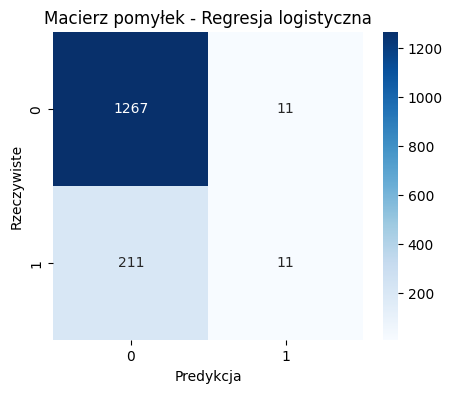

In [26]:
# Wizualizacja macierzy pomyłek
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test,y_pred_logreg), annot=True, fmt='d', cmap='Blues')
plt.title("Macierz pomyłek - Regresja logistyczna")
plt.xlabel("Predykcja")
plt.ylabel("Rzeczywiste")
plt.show()

In [27]:
# 1 - woda nadaje się do picia, 0 - woda nie nadaje się do picia

# True Negatives = 1267 - poprawnie przewidziano klasę 0
# False Positives = 11 - przewidziano 1, a było 0
# False Negatives = 211 - przewidziano 0, a było 1
# True Positives = 11 - poprawnie przewidziano klasę 1
# Wnioski: model prawie zawsze przewiduje klasę 0. Klasa 1 jest prawie niewykrywana, stąd bardzo niski F1-score 0.09 mimo wysokiego accuracy 0.85.

In [28]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train,y_train)
y_pred_tree = dtree.predict(X_test)

print("Drzewo decyzyjne:")
print("Accuracy:", accuracy_score(y_test,y_pred_tree))
print("F1-score:",f1_score(y_test,y_pred_tree))
print(classification_report(y_test,y_pred_tree))

Drzewo decyzyjne:
Accuracy: 0.7766666666666666
F1-score: 0.2917547568710359
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1278
           1       0.27      0.31      0.29       222

    accuracy                           0.78      1500
   macro avg       0.58      0.58      0.58      1500
weighted avg       0.79      0.78      0.78      1500



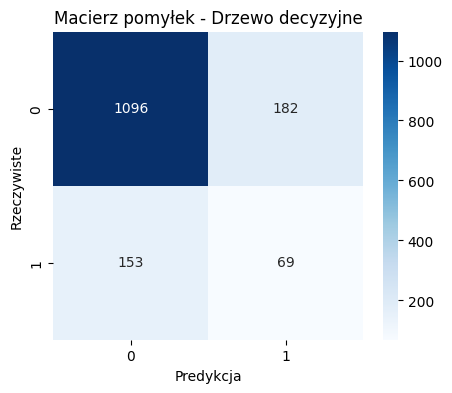

In [29]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test,y_pred_tree), annot=True, fmt='d', cmap='Blues')
plt.title("Macierz pomyłek - Drzewo decyzyjne")
plt.xlabel("Predykcja")
plt.ylabel("Rzeczywiste")
plt.show()

In [30]:
# True Negatives = 1096 - poprawnie przewidziano klasę 0
# False Positives  = 182 - przewidziano 1, a było 0
# False Negatives  = 153 - przewidziano 0, a było 1
# True Positives  = 69 - poprawnie przewidziano klasę 1
#  Wnioski:
# model wykrywa znacznie więcej przypadków klasy 1 niż regresja logistyczna, F1-score wzrósł do 0.29.
# Kosztem tego jest większa liczba fałszywych alarmów (FP) w klasie 0, dlatego accuracy spadło do 0.777.
# Drzewo decyzyjne lepiej radzi sobie z mniejszościową klasą, co jest kluczowe w problemie klasyfikacji Potability.

Porównanie wyników w tabeli

In [31]:
results = pd.DataFrame({
    'Model': ['Regresja Logistyczna', 'Drzewo Decyzyjne'],
    'Accuracy': [accuracy_score(y_test, y_pred_logreg), accuracy_score(y_test, y_pred_tree)],
    'F1-score': [f1_score(y_test, y_pred_logreg), f1_score(y_test,y_pred_tree)]
})
results

,Model,Accuracy,F1-score
0,Regresja Logistyczna,0.852000,0.090164
1,Drzewo Decyzyjne,0.776667,0.291755


Podsumowanie wyników

In [32]:
# Lepszy model: Drzewo decyzyjne
# Uzasadnienie: F1-score dla drzewa decyzyjnego 0.29 jest znacznie wyższy niż dla regresji logistycznej 0.09.
# F1-score jest ważniejszy niż accuracy przy niezrównoważonych klasach, ponieważ uwzględnia zarówno precyzję, jak i czułość.
# Regresja logistyczna osiąga wysokie accuracy, ale praktycznie ignoruje mniejszościową klasę, słabo przewiduje "niebezpieczne" próbki w Potability.

# RANDOM FOREST

In [33]:
rf = RandomForestClassifier(n_estimators=200,max_depth=None, random_state=42)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest:")
print("Accuracy:", accuracy_score(y_test,y_pred_rf))
print("F1-score:",f1_score(y_test,y_pred_rf))

Random Forest:
Accuracy: 0.8486666666666667
F1-score: 0.1684981684981685


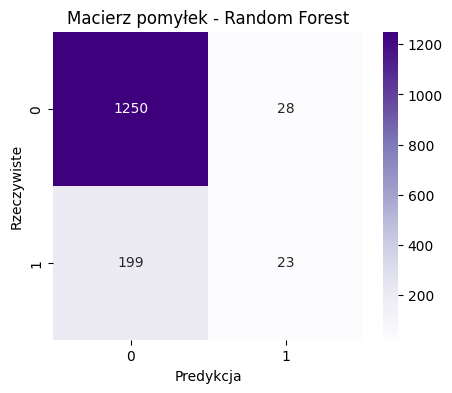

In [34]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test,y_pred_rf), annot=True, fmt='d', cmap='Purples')
plt.title("Macierz pomyłek - Random Forest")
plt.xlabel("Predykcja")
plt.ylabel("Rzeczywiste")
plt.show()

# Rozszerzone zastosowanie SMOTE(balansowanie klas)

In [35]:
data_prepared['Potability'].value_counts() # przewaga niezdatnej

,count
Potability,
0,4261
1,739


In [36]:
# przygotowanie danych
new_prepared_data = data.copy()

# uzupełnienie braków
new_prepared_data.fillna(new_prepared_data.median(), inplace=True)

# podział
X_new = new_prepared_data.drop('Potability', axis=1)
y_new = new_prepared_data['Potability']

In [37]:
new_prepared_data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.213302,189.681916,21057.662214,8.114224,230.507961,426.226462,9.954290,57.316487,3.100232,1
1,6.272011,188.020564,25394.740904,8.153630,383.472420,358.882079,13.810410,72.154087,2.741828,0
2,7.525316,172.133603,11166.376305,7.899896,326.518080,420.570021,8.614537,72.367363,4.332616,0
3,7.658395,217.139317,18288.211026,7.528133,294.005453,400.717449,11.138576,72.966391,4.153343,0
4,5.634275,209.385848,24974.919772,7.495392,314.950949,531.406569,13.023235,76.684441,1.775441,0
...,...,...,...,...,...,...,...,...,...,...
4995,7.754235,264.804246,22515.647980,9.117795,400.864300,437.755539,20.840957,49.649845,5.039723,0
4996,6.759721,197.472807,19962.843833,6.025457,304.523496,435.219703,17.538170,48.078922,3.236085,1
4997,7.546477,203.409951,12698.788440,7.769574,331.285806,569.447080,11.754191,100.532347,3.173381,0
4998,7.034818,244.989768,14062.084121,7.637251,296.592672,450.503656,8.015346,51.791159,4.062713,1


In [38]:
scaler_n = StandardScaler()
X_scaled_n = scaler_n.fit_transform(X_new)

In [39]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(
    X_scaled_n, y_new, test_size=0.3, random_state=42, stratify=y_new)

SMOTE – balansowanie klas

In [52]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_n, y_train_n)

print("Rozkład klas po SMOTE:")
print(pd.Series(y_train_smote).value_counts())

Rozkład klas po SMOTE:
Potability
0    2983
1    2983
Name: count, dtype: int64


In [59]:
rf_n = RandomForestClassifier(n_estimators=100,max_depth=20, min_samples_split=2,random_state=42)

rf_n.fit(X_train_smote, y_train_smote)

y_pred_rf_n = rf_n.predict(X_test_n)

print("Random forest z balansowaniem klas:")
print("Accuracy:", accuracy_score(y_test_n, y_pred_rf_n))
print("F1-score:", f1_score(y_test_n, y_pred_rf_n))

Random forest z balansowaniem klas:
Accuracy: 0.784
F1-score: 0.35714285714285715


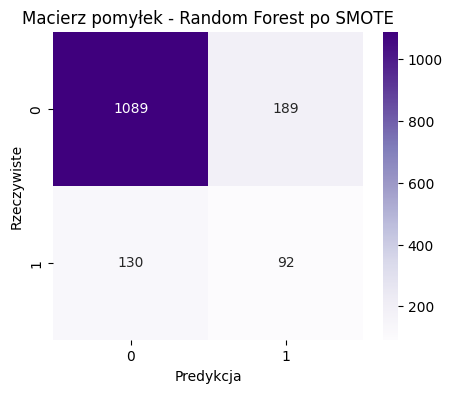

In [42]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test_n,y_pred_rf_n), annot=True, fmt='d', cmap='Purples')
plt.title("Macierz pomyłek - Random Forest po SMOTE")
plt.xlabel("Predykcja")
plt.ylabel("Rzeczywiste")
plt.show()

In [43]:
# Wzrosła liczba wykrytych klas 1: Z 23 - do 90. To ogromna poprawa.
# Co jest kosztem? Liczba FP wzrosła: z 28 do 189, czyli: model częściej "fałszywie alarmuje".
# Accuracy może spaść, ale model stał się bardziej czuły na klasę mniejszościową, F1-score wzrósł.

Najważniejsze cechy:
ph                 0.212554
Turbidity          0.170312
Trihalomethanes    0.113557
Solids             0.097998
Chloramines        0.097329
Conductivity       0.087644
Sulfate            0.085883
Organic_carbon     0.069700
Hardness           0.065023
dtype: float64


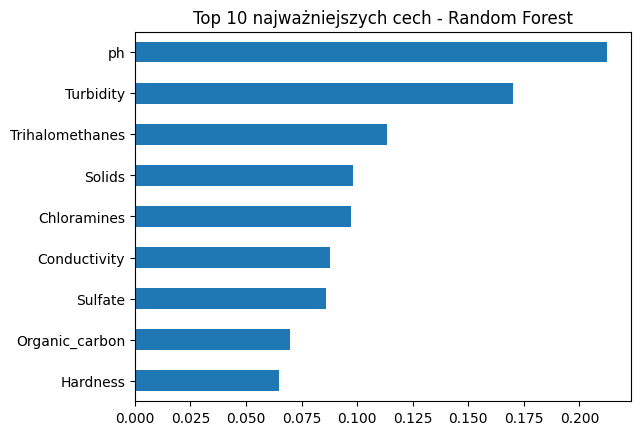

In [44]:
# cechy znaczące
feature_importance = pd.Series(rf_n.feature_importances_, index=X_new.columns)
feature_importance = feature_importance.sort_values(ascending=False)

print("Najważniejsze cechy:")
print(feature_importance.head(10))

feature_importance.head(10).plot(kind='barh')
plt.title("Top 10 najważniejszych cech - Random Forest")
plt.gca().invert_yaxis()
plt.show()

In [55]:
# Dostrajanie parametrów

from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100,200,300],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 5]
}

random_search = RandomizedSearchCV(
    estimator=rf_n,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='f1',
    random_state=42,
    n_jobs=-1 #
)

random_search.fit(X_train_smote, y_train_smote)

print("Najlepsze parametry:")
print(random_search.best_params_)

Najlepsze parametry:
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}


In [56]:
best_rf = random_search.best_estimator_
y_pred_best = best_rf.predict(X_test_n)

print("Accuracy:", accuracy_score(y_test_n, y_pred_best))
print("F1-score:", f1_score(y_test_n, y_pred_best))

Accuracy: 0.7873333333333333
F1-score: 0.3658051689860835


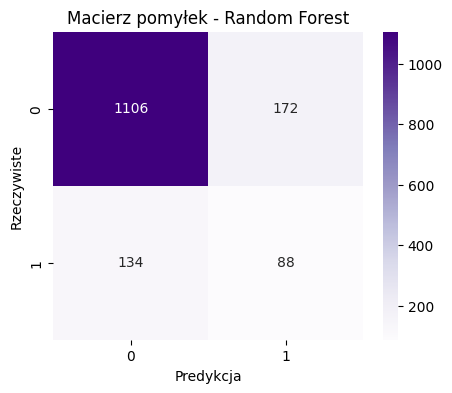

In [47]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test_n,y_pred_best), annot=True, fmt='d', cmap='Purples')
plt.title("Macierz pomyłek - Random Forest")
plt.xlabel("Predykcja")
plt.ylabel("Rzeczywiste")
plt.show()

In [48]:
# Wzrosła liczba wykrytych klas 1 do 88
# Model wykrywa teraz około 40% klasy 1 (4 razy lepiej niż wcześniej).
# Co jest kosztem? Liczba FP wzrosła do 172, czyli: model częściej "fałszywie alarmuje".
# Accuracy może spaść, ale model stał się bardziej czuły na klasę mniejszościową, F1-score wzrósł.

porównanie trzech wersji:

Random Forest przed SMOTE, Random Forest po SMOTE, Random Forest po SMOTE + tuning

In [60]:
comparison = pd.DataFrame({
    'Model': ['Random Forest przed SMOTE', 'Random Forest po SMOTE','Random Forest po SMOTE + tuning'],
    'Accuracy': [ accuracy_score(y_test,y_pred_rf), accuracy_score(y_test_n, y_pred_rf_n), accuracy_score(y_test_n, y_pred_best)],
    'F1-score': [f1_score(y_test, y_pred_rf), f1_score(y_test_n,y_pred_rf_n), f1_score(y_test_n,y_pred_best)]
})
comparison

,Model,Accuracy,F1-score
0,Random Forest przed SMOTE,0.848667,0.168498
1,Random Forest po SMOTE,0.784000,0.357143
2,Random Forest po SMOTE + tuning,0.787333,0.365805


 Model Random Forest bez balansowania danych wykazywał wysoką dokładność, jednak słabo wykrywał klasę mniejszościową (niski Recall).

 Zastosowanie SMOTE znacząco poprawiło zdolność modelu do identyfikacji klasy Potability=1, zwiększając wartość F1-score. Dodatkowy tuning hiperparametrów pozwolił

 uzyskać najlepszy kompromis między precyzją a czułością, czyniąc model najbardziej efektywnym spośród testowanych wariantów.

 Najlepszy model w tym zestawieniu: Random Forest po SMOTE + tuning (model 2), bo ma najlepszy F1-score i nadal zachowuje dobrą dokładność.